# Final Project

We have almost reached the end of our time together (heartbreaking, I know). This final project is a capstone of sorts. We will answer a number of question from the Dig case study using everything we've learned so far. We will consider a number of questions that will bring together many of the topics we discussed I warn you, that some of these topics will be complex. That said, so are the real problems businesses face every day when working with data, and this section will give you practice tackling these kinds of problems.

## 

In [2]:
# import pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

df_summarized_orders = pd.read_csv('Summarized orders new.csv')
df_students = pd.read_csv('Students.csv')
df_orders = pd.read_csv('Simplified Orders.csv')
df_items = pd.read_csv('Items.csv')
df_restaurants = pd.read_csv('Restaurants.csv')
df_dig = pd.read_csv('dig.csv')




## 1. New Product Analytics

As you read in the story of Dig, one of the company's greatest sources of price is that each restaurant prepares everything on site. Indeed, every one of its employees are trained to prepare food in it restaurants, in line with this ethos. There is, however, one exception - bottled and canned drinks. The infrastructure required to produce these items is usually prohibitive. Futhermore, a number of companies that produce these products share Dig's ethos for responsible courcing and high-quality ingredients. Therefore, it is perhaps unsurprising that, as you read, Dig does not produce its own bottled and canned drinks and instead stocks a number of products produced by other companies.

In this section, we consider a hypothetical furture in which Dig does decide to launch a new line of drinks of its own. When a company launches a new product, it often decides to first launch at a single location and then expand chain-wide. Your task for this section is to help Dig to decide at which restaurant to launch this new product line, and when in the year to do it.

Notice a key difference between this question, and those we have done before. In previous examples, the question were phrased mostly in the context of the data, and it was clear how to use the data to answer them - the only question was what pandas code we would need to execute each step. This question is far more ambiguous, and we first need to figure out how to phrase this in the context of data.

Before you begin, spend a few minutes thinking about this. What questions might you want to ask of the data? How might you want to get the answers? Here are some questions to get you started, but by all means, come up with more:

* we'd like to find places where drinks are popular - launching the line in a restaurant where no one buys drinks seems counterproductive. Our first question is whether some restaurants customers tend to order more drinks than others
* let's next turn our attenetion to time. How might we decide when in the year to launch it?
* now that we have the restaurant where drinks are popular, and the time of year drinks are popular. Does that seasonalilty hold up if we look at just the top restaurant?

In [3]:

# Merge dataframes to get all the required information
df_merged = df_dig.merge(df_restaurants, on='RESTAURANT_ID')

# Group by restaurant and calculate the average number of drinks ordered
drink_popularity = df_merged.groupby('RESTAURANT_ID')['DRINKS'].mean()

# Find the restaurant with the highest average number of drinks ordered
top_restaurant = drink_popularity.idxmax()

print("ID of Restaurant with the highest average number of drinks ordered:", top_restaurant, "and the average high is:",drink_popularity[top_restaurant])

# Convert the 'DATETIME' column to a datetime data type
df_merged['DATETIME'] = pd.to_datetime(df_merged['DATETIME'])

# Extract the month from the 'DATETIME' column
df_merged['month'] = df_merged['DATETIME'].dt.month

# Group by month and calculate the average number of drinks ordered
monthly_drink_orders = df_merged.groupby('month')['DRINKS'].mean()

# Find the month with the highest average number of drinks ordered
best_month_to_launch = monthly_drink_orders.idxmax()

print("Best month to launch the new product line:", best_month_to_launch)

# Filter data for the top restaurant
df_top_restaurant = df_merged[df_merged['RESTAURANT_ID'] == top_restaurant]

# Group by month and calculate the average number of drinks ordered for the top restaurant
monthly_drink_orders_top_restaurant = df_top_restaurant.groupby('month')['DRINKS'].mean()

# Find the month with the highest average number of drinks ordered for the top restaurant
best_month_top_restaurant = monthly_drink_orders_top_restaurant.idxmax()

print("Best month to launch the new product line at the top restaurant:", best_month_top_restaurant)

ID of Restaurant with the highest average number of drinks ordered: R10002 and the average high is: 0.1261279264599634
Best month to launch the new product line: 8
Best month to launch the new product line at the top restaurant: 8


## 2. The Next Frontier

Dig is a young company entering a phase of exponential growth. One of the more exciting aspects of this growth is the company's expansion beyond its central restaurant offering to delivery, pick-up orders, and catering. These new lines of business were immediately popular when Dig launched them, with as many as 30 percent of orders coming from deliveries at some stores. However, this sucess came with challenges. Dig initally treated delivery as a 'bolt-on' service to its primary restaurant offering, allowing customers to order using the in-store menu, and contracting with third party services for delivery. This mirrored the approach taken by many of Dig's competitors, but it quickly became apparent to Dig's leadership that this led to a substandard customer experience. Among other problems, Dig's extensive menu meant that there were approximately 1,500 different possible Dig bowls, some of which were far better suited to delivery than others

Dig realized an opportunity when it saw one, and it decided to heavily focus on ways to puch the boundaries of how customers experienced Dig. In particular, it decided to create a brand-new, reimagined delivery service, with an entirely new menu and platform, built and optimized specifically for delivery. This would make it a trailblazer in the industry and put the company in a prime position to capture this increasingly large segment of the market.

As you can imagine, creating a brand-new delivery service is no small endeavor. There are some benefits to being the first mover, but it also means there's no rulebook to follow. In this section, your task is to design Dig's delivery-specific menu. Again, take a few minutes and think of the kinds of questions you might need to answer this problem. Here are four question to get you started:

1. What's the most popular main?
2. What's the most popular base?
3. What main is most popular with which base?
4. How does this all relate to sides?

In [4]:
#Popular Main
popular_main = df_dig.groupby('MAIN_NAME')['ORDER_ID'].count().idxmax()
print("Most popular Main: ", popular_main)

#Popular Base
popular_base = df_dig.groupby('BASE_NAME')['ORDER_ID'].count().idxmax()
print("Most popular Base: ", popular_base)

#Most Popular Main with Base 

#Group by BASE_NAME and MAIN_NAME and calculating total number of orders
popular_main_with_base = df_dig.groupby(['BASE_NAME', 'MAIN_NAME'])['ORDER_ID'].count()

# Find the most popular main for each base
most_popular_main_with_base = popular_main_with_base.groupby('BASE_NAME').idxmax().reset_index()
most_popular_main_with_base.columns = ['BASE_NAME', 'Most_Popular_Main']

print("\nMost popular main with each base:\n", most_popular_main_with_base)

# Relation to sides
# Group by SIDE_1_NAME and SIDE_2_NAME and then calculate the total number of orders for each side combination
popular_sides = df_dig.groupby(['SIDE_1_NAME', 'SIDE_2_NAME'])['ORDER_ID'].count()
print("\nPopular side combinations:", popular_sides)

# Finding most popular individual side 
most_popular_side = popular_sides.idxmax()
print("\nMost popular side combination:", most_popular_side)

Most popular Main:  Charred Chicken Marketbowl
Most popular Base:  Farm Greens with Mint

Most popular main with each base:
                       BASE_NAME  \
0            Classic Brown Rice   
1         Farm Greens with Mint   
2  Farro with Summer Vegetables   

                                   Most_Popular_Main  
0   (Classic Brown Rice, Charred Chicken Marketbowl)  
1  (Farm Greens with Mint, Herb Roasted Chicken M...  
2  (Farro with Summer Vegetables, Herb Roasted Ch...  

Popular side combinations: SIDE_1_NAME          SIDE_2_NAME                         
Blistered Shishitos  Blistered Shishitos                      18762
                     Cashew Kale Caesar                       17781
                     Cauliflower with Garlic and Parmesan     13565
                     Charred Broccoli with Lemon              19653
                     Green Goddess Beans with Sesame          13368
                                                              ...  
Snap Peas           

## 3. Finding Fertile Ground For a New Delivery Service

In this section, we will consider this new delivery service from a different angle. Dig's delivery service is popular at some of its restaurants, but in extending this service, we might want to know the restaurants at which deliveries are most popular. This might help us decide which restaurant to use as a pilot for the new program. What location should Dig pilot this new delivery service and why? Some questions to ask yourself:


In [5]:
# Group by 'RESTAURANT_ID' and calculate the total number of orders and delivery orders for each restaurant
total_orders = df_merged.groupby('RESTAURANT_ID')['ORDER_ID'].count() #df_merged has been done in question 1
delivery_orders = df_merged[df_merged['TYPE'] == 'DELIVERY'].groupby('RESTAURANT_ID')['ORDER_ID'].count()

# Calculate the percentage of delivery orders for each restaurant
delivery_percentage = (delivery_orders / total_orders) * 100

# Find the restaurant with the highest percentage of delivery orders (pilot location)
pilot_location = delivery_percentage.idxmax()

# Get the name of the restaurant using the 'NAME' column from the 'df_restaurants' DataFrame
pilot_restaurant_name = df_restaurants[df_restaurants['RESTAURANT_ID'] == pilot_location]['NAME'].values[0]

print("Location for the pilot delivery service:", pilot_restaurant_name)
print("Percentage of delivery orders at the pilot location:", delivery_percentage.max())

print(f"\nThe restaurant {pilot_restaurant_name} has the highest percentage of delivery orders. \nThis location would be a suitable pilot for the new delivery service, as it already demonstrates a high demand for deliveries.")

Location for the pilot delivery service: Upper West Side
Percentage of delivery orders at the pilot location: 18.968583073125973

The restaurant Upper West Side has the highest percentage of delivery orders. 
This location would be a suitable pilot for the new delivery service, as it already demonstrates a high demand for deliveries.


## 4. Understanding Your Customers: Are Salad eaters Healthier?

There are three possible bases in every Dig bowl: salad, farro, and rice. We ight assume that customers who choose a salad as a base are looking for healthier, lower-calorie options in their diet. But is this true, or do people just happen to like lettuce? This question is relevant because it allows us to know our cusomters better and, to design a delivery menu that serves them better. If we do indeed find that salad eaters gravitate toward healtheir options, we would want to include a number of salad-based bowls with healthy sides and mains on our menu. Conversely, if we find little relationship between these options, we might instead focus on designing bowls that we think will be tastiest and travel best.

How might we define a 'health' customer? Again, this quetion is ambiguous and no column defines this. There are two other columns that might act as proxies for this. First, how many cookies are in each order and second, the sides that were ordered in the bowl (mac and cheese vs. cauliflower with parmesan). Let's rephrase our question as follows: 1/ do people who order bowls with salad bases tend to order fewer cookies and 2/ is the mix of sides different for thos who order bowls with salad bases?

**Bonus question** how do we know that the differnece in part 1. is statistically significant and not a random coindence? If you are familiar with introductory statitics, we can measure this using a t-test, where an output of the p-value being close to 0.0 is statisically significant and a large p-value being random. To do this, you will need to import scipy and use the stats.ttest_ind() function. Remember, to look at the documentation (or Google) to see how to use this function.

In [6]:
# 1: Filter rows with salad bases
df_salad_bases = df_dig[df_dig['BASE_NAME'] == 'Farm Greens with Mint']

# 2: Analyze cookie orders for salad-based bowls
average_cookies_salad_bases = df_salad_bases['COOKIES'].mean()
print("Average number of cookies for salad-based bowls:", average_cookies_salad_bases)

# 3: Analyze mix of sides for salad-based bowls
# Count the number of occurrences of each side in the dataset
side_counts_salad_bases = df_salad_bases['SIDE_1_NAME'].append(df_salad_bases['SIDE_2_NAME']).value_counts()

print("Mix of sides for salad-based bowls:")
print(side_counts_salad_bases)

# Bonus question
df_non_salad_bases = df_dig[df_dig['BASE_NAME'] != 'Farm Greens with Mint']
t_stat, p_value = stats.ttest_ind(df_salad_bases['COOKIES'], df_non_salad_bases['COOKIES'], equal_var=False)

print("T-test p-value:", p_value)

Average number of cookies for salad-based bowls: 0.08817561054247083
Mix of sides for salad-based bowls:
Roasted Sweet Potatoes                  453266
Snap Peas                               447875
Charred Broccoli with Lemon             236413
Cashew Kale Caesar                      217333
Blistered Shishitos                     193227
Green Goddess Beans with Sesame         175774
Cauliflower with Garlic and Parmesan     62485
Jasper Hill Mac & Cheese                 49781
dtype: int64


/var/folders/ff/84hd1fzx40l4z1__mgyg4fzc0000gn/T/ipykernel_1028/772464019.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  side_counts_salad_bases = df_salad_bases['SIDE_1_NAME'].append(df_salad_bases['SIDE_2_NAME']).value_counts()


T-test p-value: 0.0


## 5. Orders and Weather

For our final analysis, we look at the relationship between various order patterns and the weather. This relationship could touch on many parts of Dig' operations, from food ordering, to staffing levels, to promotional efforts, to the company's new delivery service. For this analysis, we will look at two specific questions (but feel free to add in anything else you think is useful).

1. We migh expect the proportion of delivery orders to depend heavily on the weather. In particular, we might expect deliveries to be higher during the winter. Is this true? This will affect how we might plan staffing for those periods.
2. Does the temperature outside affect the number of drinks customers order? This might affect our choice of when to launch the new drink line we discussed, or perhaps help staff members decide when to displat promotional posters for drinks in stores.

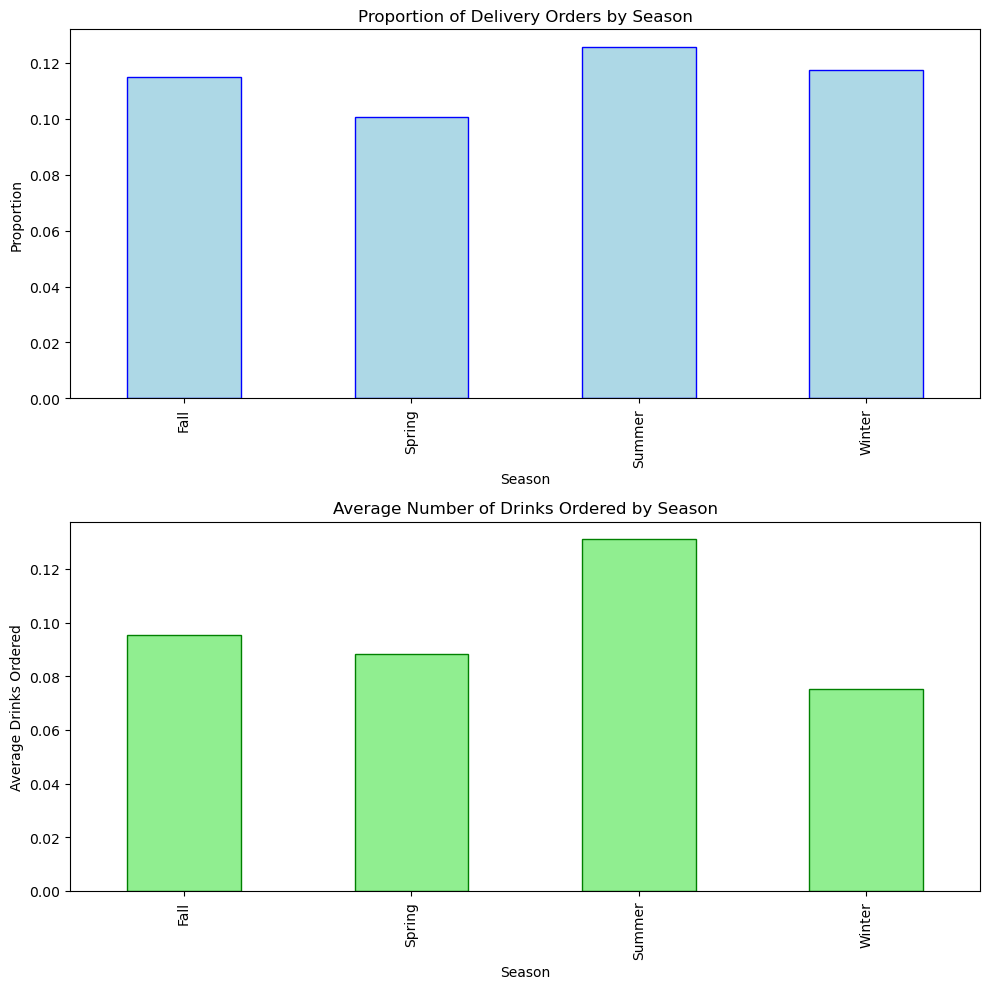

In [34]:
# Convert 'DATETIME' column to datetime data type
df_dig['DATETIME'] = pd.to_datetime(df_dig['DATETIME'])

# Define a function to get the season based on the month
def get_season(month):
    if month in [12, 1, 2]: # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]: # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]: # June, July, August
        return 'Summer'
    else:
        return 'Fall' # September, October, November

# Create a new 'SEASON' column
df_dig['SEASON'] = df_dig['DATETIME'].dt.month.apply(get_season)

# Analyze the proportion of delivery orders for each season
delivery_orders_by_season = df_dig[df_dig['TYPE'] == 'DELIVERY']['SEASON'].value_counts()
total_orders_by_season = df_dig['SEASON'].value_counts()
proportion_delivery_by_season = delivery_orders_by_season / total_orders_by_season

# Analyze the average number of drinks ordered for each season
average_drinks_by_season = df_dig.groupby('SEASON')['DRINKS'].mean()

# Plot the results
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
proportion_delivery_by_season.plot(kind='bar', color='lightblue', edgecolor='blue')
plt.title('Proportion of Delivery Orders by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')

plt.subplot(2, 1, 2)
average_drinks_by_season.plot(kind='bar', color='lightgreen', edgecolor='green')
plt.title('Average Number of Drinks Ordered by Season')
plt.xlabel('Season')
plt.ylabel('Average Drinks Ordered')

plt.tight_layout() #ensures that the subplots are properly spaced and do not overlap
plt.show()

1. As we can see from the above plots, the deliveries are higher during the summer season and lowest during spring. Hence, the assumption that winters have the highest number of deliveries is not right. 

2. Yes, the temperature outside affects the number of drinks customers order. We can see that summer months have highest number of drinks ordered and winters have the lowest. Hence, it is recommended to launch the new drink line in summer months when the temperature is high and the staff members can display promotional posters for drinks in stores during this time.